# Rainfall Prediction 

### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [3]:
df = pd.read_csv(r'Rainfall.csv')
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [13]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [15]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print('________________________________________')

day
31
________________________________________
pressure 
188
________________________________________
maxtemp
174
________________________________________
temparature
158
________________________________________
mintemp
157
________________________________________
dewpoint
158
________________________________________
humidity 
49
________________________________________
cloud 
79
________________________________________
rainfall
2
________________________________________
sunshine
104
________________________________________
winddirection
31
________________________________________
windspeed
223
________________________________________


### Data Cleaning

In [17]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

As we can see there is extra space in the columns at the last it will be bit annoying for further process of model building

In [23]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [27]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

As we can see there two columns have 1 null value each 

#### Replacing those Null values with median

In [30]:
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].median())
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [32]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

### Analysis & Visualization

In [39]:
df['rainfall'].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

#### 1. Rainfall Rate 

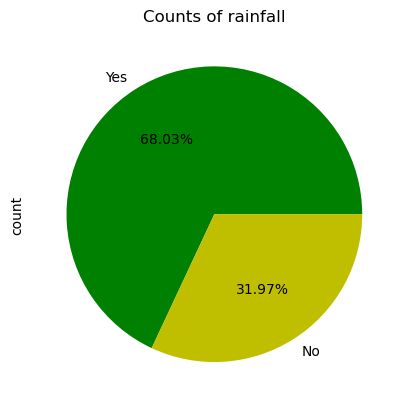

In [42]:
c = ["g","y"]
df['rainfall'].value_counts().plot.pie(autopct='%.2f%%',labels = ['Yes','No'],colors=c)
plt.title('Counts of rainfall')
plt.show()

In [46]:
df.groupby('rainfall').mean().T

rainfall,no,yes
day,15.623932,15.819277
pressure,1014.576923,1013.350602
maxtemp,27.070940,25.777912
temparature,24.053846,23.603213
mintemp,21.957265,21.865060
dewpoint,18.766667,20.563454
humidity,73.000000,83.550201
cloud,51.256410,80.465863
sunshine,7.586325,2.931325
winddirection,103.076923,100.642570


In [50]:
df.replace({'yes':1, 'no':0}, inplace=True)
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


#### Checking for Outliers

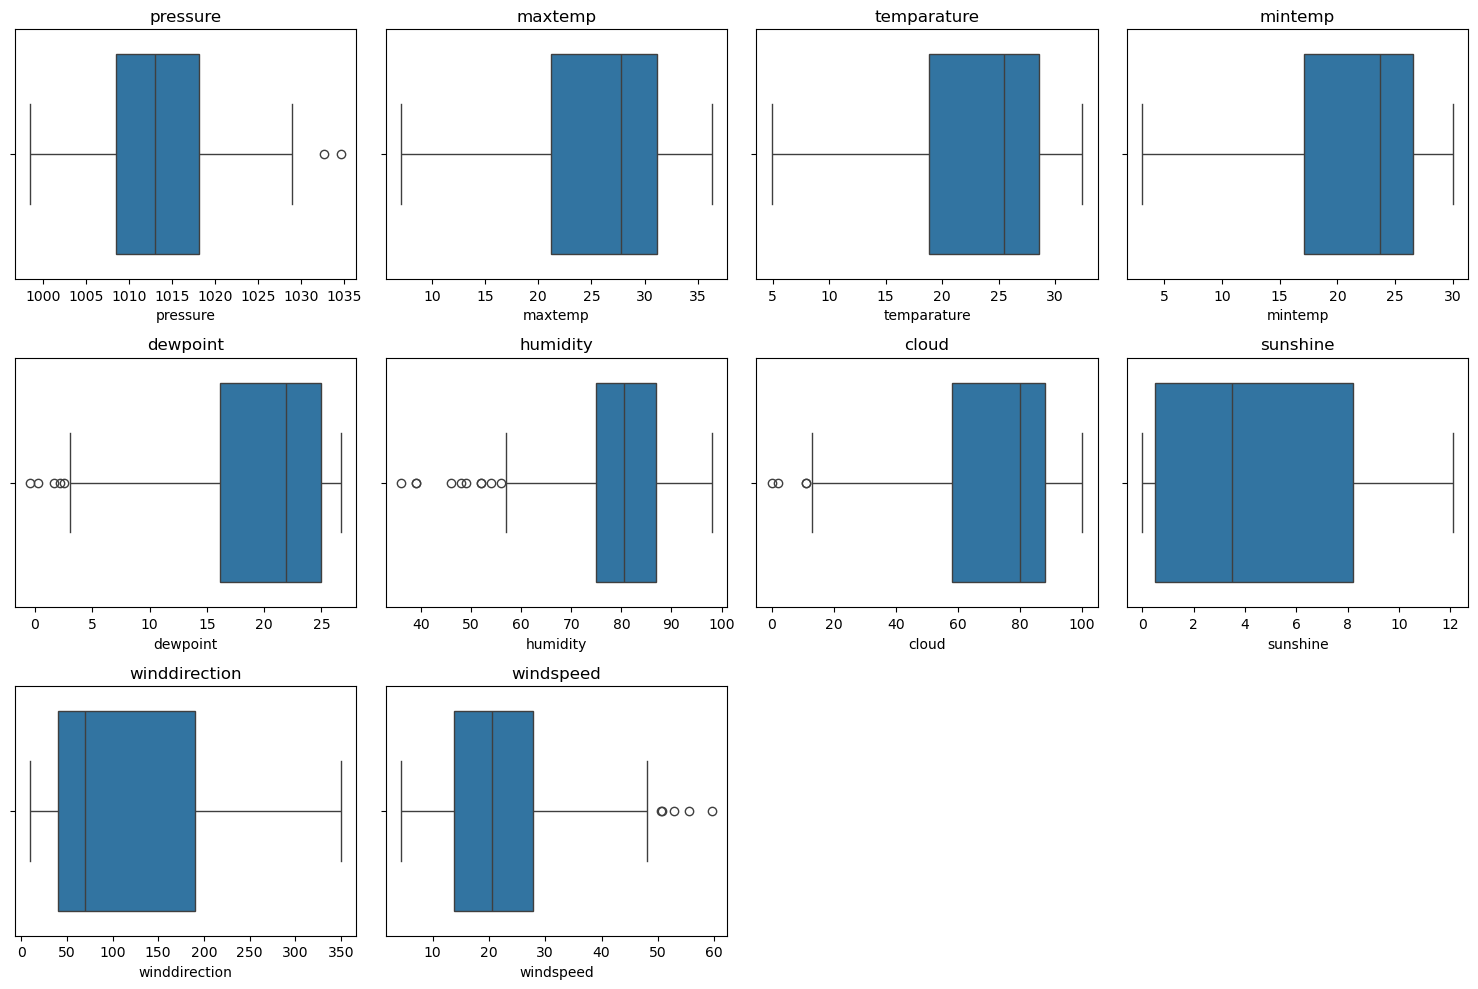

In [53]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
           'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
plt.figure(figsize=(15, 10))
for i in range(len(columns)):
    plt.subplot(3, 4, i + 1)  
    sns.boxplot(data=df, x=columns[i])
    plt.title(columns[i])
plt.tight_layout()
plt.show()

#### Removing outliers

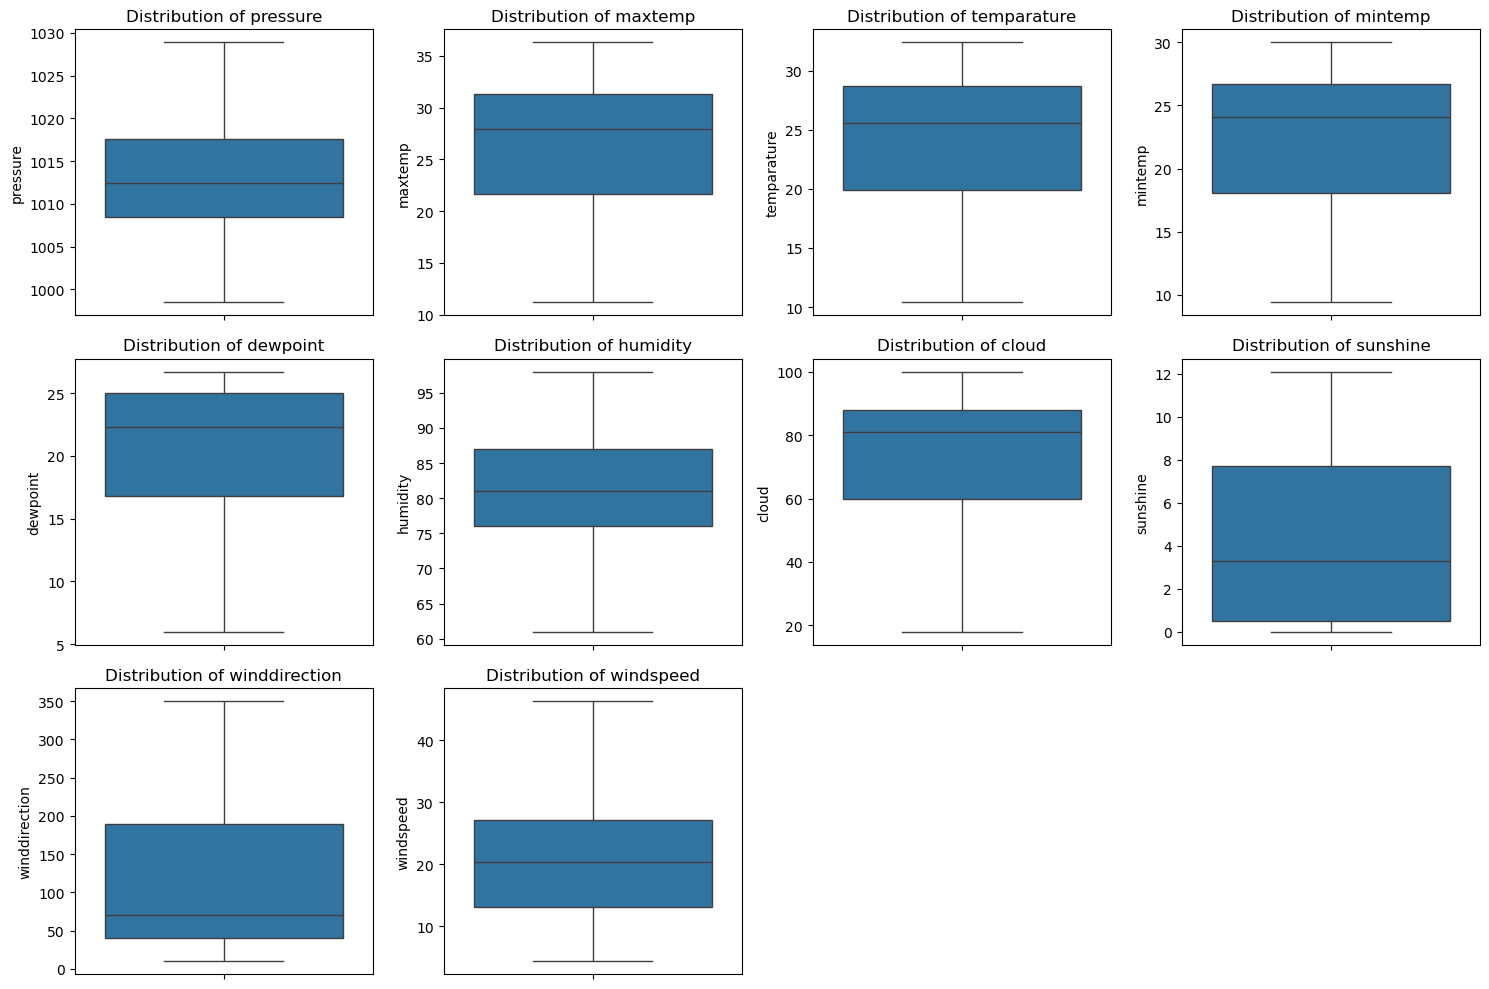

In [57]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
           'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for column in columns:
    df = remove_outliers(df, column)
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

#### 2. Daily Rainfall rate

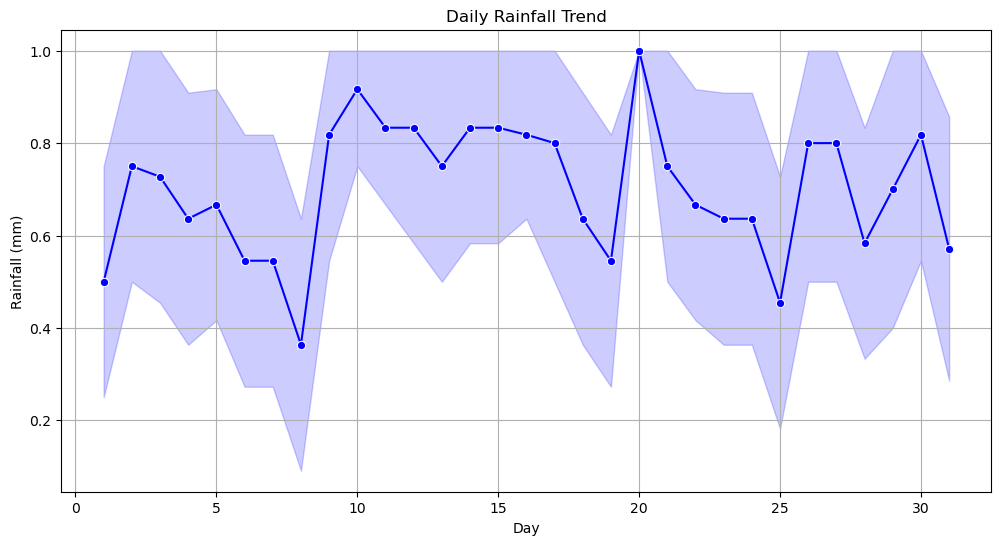

In [61]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='day', y='rainfall',marker='o', color='b')
plt.title("Daily Rainfall Trend")
plt.xlabel("Day")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.show()

#### Rainfall w.r.t Wind Direction

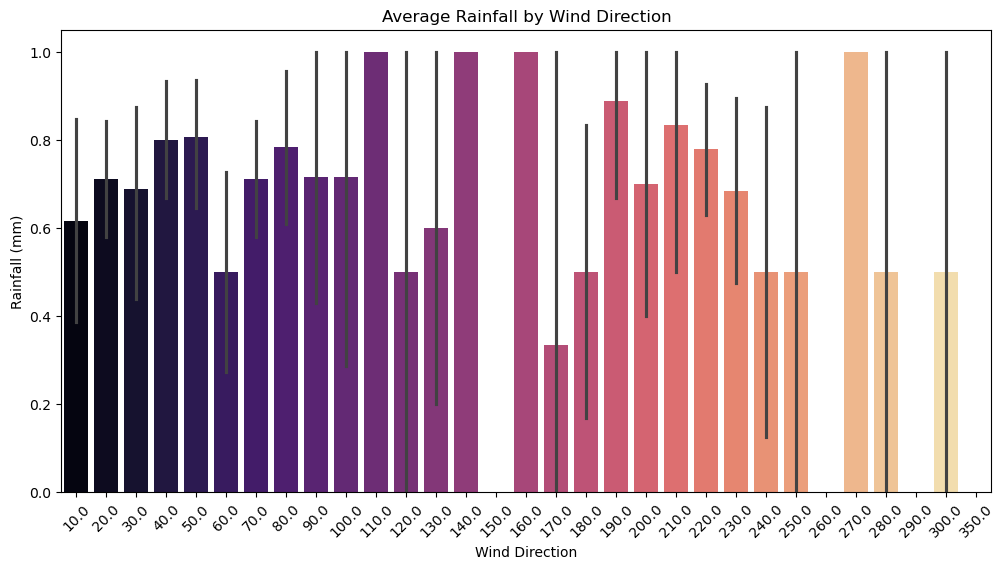

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='winddirection', y='rainfall',palette="magma")
plt.title("Average Rainfall by Wind Direction")
plt.xlabel("Wind Direction")
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

#### Correlation

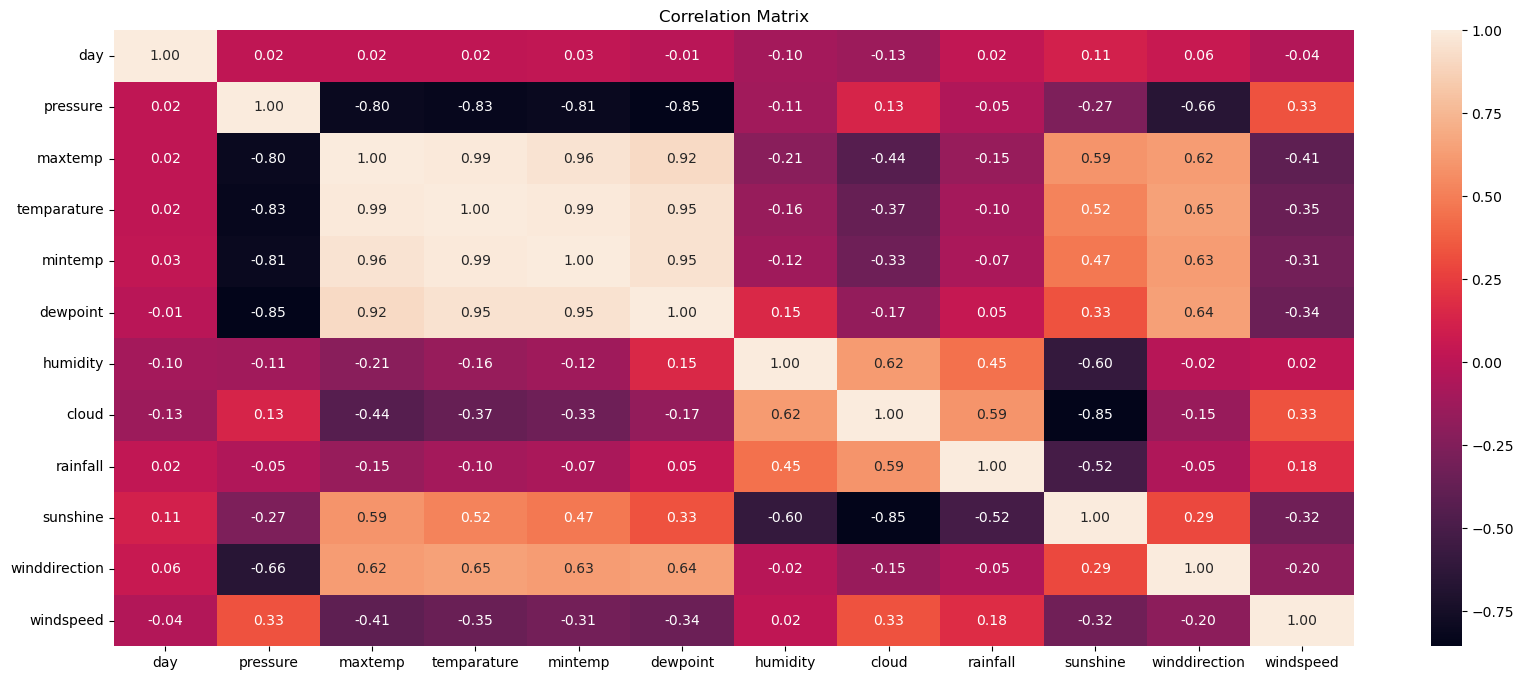

In [66]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot = True,fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [71]:
df = df.drop(columns = ['day'])

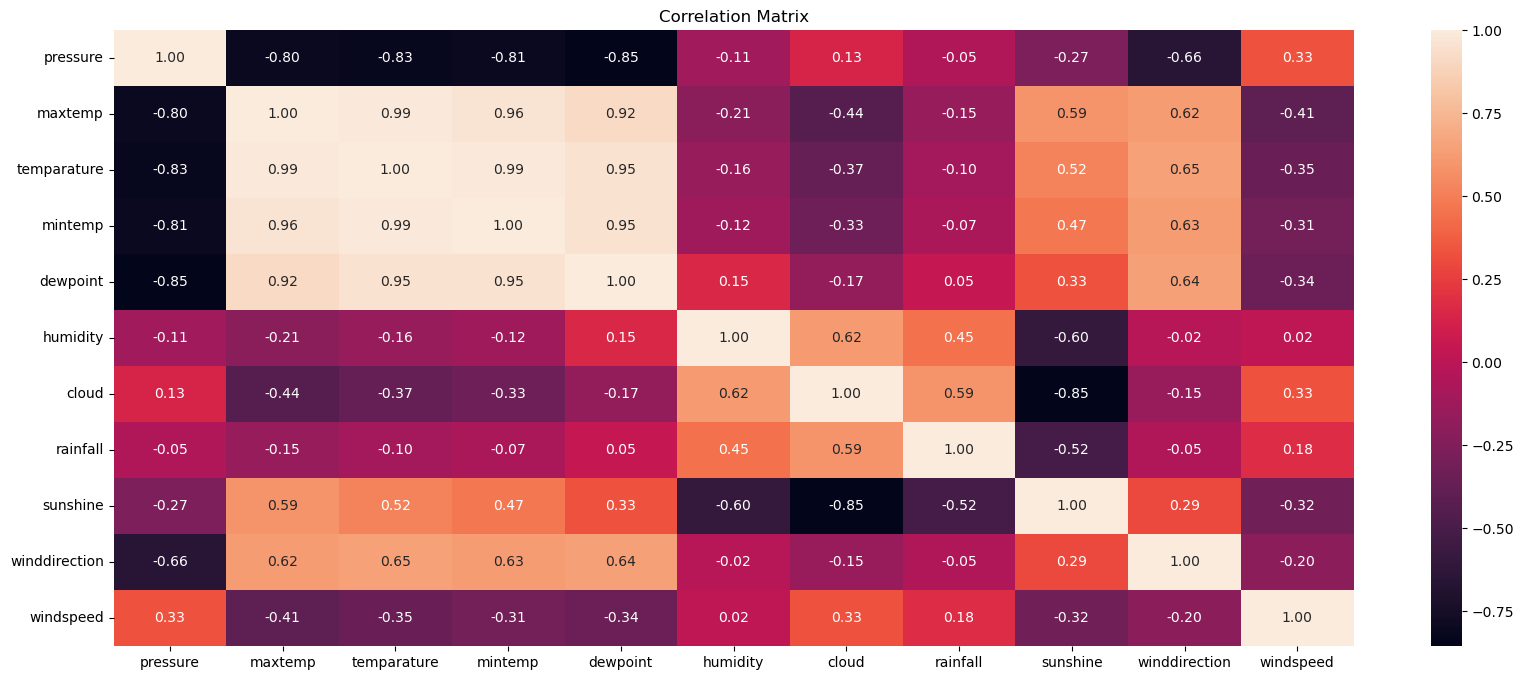

In [73]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot = True,fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering

#### Feature 

In [76]:
x = df.drop(['rainfall'], axis=1)
x

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1.2,20.0,20.9


#### Target

In [80]:
y = df.iloc[:,7]
y

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: rainfall, Length: 344, dtype: int64

In [94]:
y.value_counts()

rainfall
1    242
0    102
Name: count, dtype: int64

As we can see the data is a bit unbalanced

### Balancing Data 

In [98]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(x,y)
y.value_counts()

rainfall
1    242
0    242
Name: count, dtype: int64

### Train Test Split

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=42)

### Scaling

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

#### Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

##### Model Evaluation

In [118]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.7422680412371134
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        52
           1       0.67      0.89      0.76        45

    accuracy                           0.74        97
   macro avg       0.77      0.75      0.74        97
weighted avg       0.77      0.74      0.74        97

Training Performance : 0.8036175710594315
Testing Performance : 0.7422680412371134


##### Solvers

In [123]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.7422680412371134
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        52
           1       0.67      0.89      0.76        45

    accuracy                           0.74        97
   macro avg       0.77      0.75      0.74        97
weighted avg       0.77      0.74      0.74        97

Training Performance : 0.8036175710594315
Testing Performance : 0.7422680412371134


In [125]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'saga')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.7422680412371134
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        52
           1       0.67      0.89      0.76        45

    accuracy                           0.74        97
   macro avg       0.77      0.75      0.74        97
weighted avg       0.77      0.74      0.74        97

Training Performance : 0.8036175710594315
Testing Performance : 0.7422680412371134


In [127]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cholesky')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.7422680412371134
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        52
           1       0.67      0.89      0.76        45

    accuracy                           0.74        97
   macro avg       0.77      0.75      0.74        97
weighted avg       0.77      0.74      0.74        97

Training Performance : 0.8036175710594315
Testing Performance : 0.7422680412371134


In [129]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.7422680412371134
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        52
           1       0.67      0.89      0.76        45

    accuracy                           0.74        97
   macro avg       0.77      0.75      0.74        97
weighted avg       0.77      0.74      0.74        97

Training Performance : 0.8036175710594315
Testing Performance : 0.7422680412371134


In [131]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.7422680412371134
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        52
           1       0.67      0.89      0.76        45

    accuracy                           0.74        97
   macro avg       0.77      0.75      0.74        97
weighted avg       0.77      0.74      0.74        97

Training Performance : 0.8036175710594315
Testing Performance : 0.7422680412371134


#### Naive Bayes 

In [135]:
gb=GaussianNB()
br=BernoulliNB()

In [137]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    train=model.score(X_train,y_train)
    test=model.score(X_test,y_test)
    print("Accuracy Score :",accuracy_score(y_test,y_pred))
    print(classification_report(y_pred,y_test))
    print(f"Trainig ac:{train}\nTesting ac:{test}\n")
    return model

In [139]:
mymodel(gb)

Accuracy Score : 0.7731958762886598
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        40
           1       0.89      0.70      0.78        57

    accuracy                           0.77        97
   macro avg       0.78      0.79      0.77        97
weighted avg       0.80      0.77      0.77        97

Trainig ac:0.7622739018087855
Testing ac:0.7731958762886598



GaussianNB()

In [141]:
mymodel(br)

Accuracy Score : 0.7731958762886598
              precision    recall  f1-score   support

           0       0.65      0.89      0.76        38
           1       0.91      0.69      0.79        59

    accuracy                           0.77        97
   macro avg       0.78      0.79      0.77        97
weighted avg       0.81      0.77      0.78        97

Trainig ac:0.7674418604651163
Testing ac:0.7731958762886598



BernoulliNB()

#### Support Vector Machine

In [144]:
svm = SVC()

In [146]:
mymodel(svm)

Accuracy Score : 0.7835051546391752
              precision    recall  f1-score   support

           0       0.69      0.88      0.77        41
           1       0.89      0.71      0.79        56

    accuracy                           0.78        97
   macro avg       0.79      0.80      0.78        97
weighted avg       0.81      0.78      0.78        97

Trainig ac:0.8087855297157622
Testing ac:0.7835051546391752



SVC()

##### Using Kernels

In [154]:
svm = SVC(kernel = 'linear')
mymodel(svm)

Accuracy Score : 0.7525773195876289
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        36
           1       0.91      0.67      0.77        61

    accuracy                           0.75        97
   macro avg       0.76      0.78      0.75        97
weighted avg       0.80      0.75      0.76        97

Trainig ac:0.7777777777777778
Testing ac:0.7525773195876289



SVC(kernel='linear')

In [156]:
svm=SVC(kernel='poly')
mymodel(svm)

Accuracy Score : 0.7319587628865979
              precision    recall  f1-score   support

           0       0.58      0.88      0.70        34
           1       0.91      0.65      0.76        63

    accuracy                           0.73        97
   macro avg       0.74      0.77      0.73        97
weighted avg       0.79      0.73      0.74        97

Trainig ac:0.7881136950904393
Testing ac:0.7319587628865979



SVC(kernel='poly')

In [158]:
svm=SVC(kernel='rbf')
mymodel(svm)

Accuracy Score : 0.7835051546391752
              precision    recall  f1-score   support

           0       0.69      0.88      0.77        41
           1       0.89      0.71      0.79        56

    accuracy                           0.78        97
   macro avg       0.79      0.80      0.78        97
weighted avg       0.81      0.78      0.78        97

Trainig ac:0.8087855297157622
Testing ac:0.7835051546391752



SVC()

In [160]:
svm=SVC(kernel='sigmoid')
mymodel(svm)

Accuracy Score : 0.7731958762886598
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        48
           1       0.80      0.73      0.77        49

    accuracy                           0.77        97
   macro avg       0.78      0.77      0.77        97
weighted avg       0.78      0.77      0.77        97

Trainig ac:0.6666666666666666
Testing ac:0.7731958762886598



SVC(kernel='sigmoid')

In [162]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.782 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.795 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.727 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.883 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.688 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.782 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.795 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.727 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.883 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.688 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.782 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [164]:
 print("Best Parameters : ",grid.best_params_)  
print("Best Estimators : ",grid.best_estimator_) 

Best Parameters :  {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best Estimators :  SVC(C=10, gamma=1, kernel='linear')


In [166]:
svm=SVC(kernel='linear', C = 10, gamma = 1)
mymodel(svm)

Accuracy Score : 0.7525773195876289
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        36
           1       0.91      0.67      0.77        61

    accuracy                           0.75        97
   macro avg       0.76      0.78      0.75        97
weighted avg       0.80      0.75      0.76        97

Trainig ac:0.7777777777777778
Testing ac:0.7525773195876289



SVC(C=10, gamma=1, kernel='linear')

#### Decision Tree

In [171]:
dt1=DecisionTreeClassifier()
mymodel(dt1)

Accuracy Score : 0.8762886597938144
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        54
           1       0.84      0.88      0.86        43

    accuracy                           0.88        97
   macro avg       0.87      0.88      0.88        97
weighted avg       0.88      0.88      0.88        97

Trainig ac:1.0
Testing ac:0.8762886597938144



DecisionTreeClassifier()

In [173]:
for i in range(1,51):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(X_train,y_train)
    y_pred=dt1.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Max depth={i} accuracy={ac}')

Max depth=1 accuracy=0.6907216494845361
Max depth=2 accuracy=0.6804123711340206
Max depth=3 accuracy=0.7731958762886598
Max depth=4 accuracy=0.7731958762886598
Max depth=5 accuracy=0.8762886597938144
Max depth=6 accuracy=0.8247422680412371
Max depth=7 accuracy=0.8350515463917526
Max depth=8 accuracy=0.845360824742268
Max depth=9 accuracy=0.8762886597938144
Max depth=10 accuracy=0.865979381443299
Max depth=11 accuracy=0.8556701030927835
Max depth=12 accuracy=0.8762886597938144
Max depth=13 accuracy=0.8556701030927835
Max depth=14 accuracy=0.865979381443299
Max depth=15 accuracy=0.845360824742268
Max depth=16 accuracy=0.8556701030927835
Max depth=17 accuracy=0.8556701030927835
Max depth=18 accuracy=0.8556701030927835
Max depth=19 accuracy=0.8762886597938144
Max depth=20 accuracy=0.8762886597938144
Max depth=21 accuracy=0.865979381443299
Max depth=22 accuracy=0.8556701030927835
Max depth=23 accuracy=0.865979381443299
Max depth=24 accuracy=0.865979381443299
Max depth=25 accuracy=0.85567010

In [189]:
dt1=DecisionTreeClassifier(max_depth = 5)
mymodel(dt1)

Accuracy Score : 0.8762886597938144
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        48
           1       0.91      0.84      0.87        49

    accuracy                           0.88        97
   macro avg       0.88      0.88      0.88        97
weighted avg       0.88      0.88      0.88        97

Trainig ac:0.8992248062015504
Testing ac:0.8762886597938144



DecisionTreeClassifier(max_depth=5)

In [191]:
for i in range(2,111):
    dt2=DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(X_train,y_train)
    y_pred=dt2.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample split={i} accuracy={ac}')

Min sample split=2 accuracy=0.8556701030927835
Min sample split=3 accuracy=0.865979381443299
Min sample split=4 accuracy=0.845360824742268
Min sample split=5 accuracy=0.8556701030927835
Min sample split=6 accuracy=0.8350515463917526
Min sample split=7 accuracy=0.8350515463917526
Min sample split=8 accuracy=0.8350515463917526
Min sample split=9 accuracy=0.865979381443299
Min sample split=10 accuracy=0.865979381443299
Min sample split=11 accuracy=0.845360824742268
Min sample split=12 accuracy=0.865979381443299
Min sample split=13 accuracy=0.8762886597938144
Min sample split=14 accuracy=0.8762886597938144
Min sample split=15 accuracy=0.8969072164948454
Min sample split=16 accuracy=0.865979381443299
Min sample split=17 accuracy=0.8556701030927835
Min sample split=18 accuracy=0.865979381443299
Min sample split=19 accuracy=0.8556701030927835
Min sample split=20 accuracy=0.8556701030927835
Min sample split=21 accuracy=0.8556701030927835
Min sample split=22 accuracy=0.8556701030927835
Min samp

In [193]:
dt1=DecisionTreeClassifier(min_samples_split = 15)
mymodel(dt1)

Accuracy Score : 0.8762886597938144
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        52
           1       0.87      0.87      0.87        45

    accuracy                           0.88        97
   macro avg       0.88      0.88      0.88        97
weighted avg       0.88      0.88      0.88        97

Trainig ac:0.9069767441860465
Testing ac:0.8762886597938144



DecisionTreeClassifier(min_samples_split=15)

In [183]:
for i in range(2,111):
    dt3=DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(X_train,y_train)
    y_pred=dt3.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample leaf={i} accuracy={ac}')

Min sample leaf=2 accuracy=0.7835051546391752
Min sample leaf=3 accuracy=0.8041237113402062
Min sample leaf=4 accuracy=0.865979381443299
Min sample leaf=5 accuracy=0.9175257731958762
Min sample leaf=6 accuracy=0.9072164948453608
Min sample leaf=7 accuracy=0.8865979381443299
Min sample leaf=8 accuracy=0.8556701030927835
Min sample leaf=9 accuracy=0.8041237113402062
Min sample leaf=10 accuracy=0.8144329896907216
Min sample leaf=11 accuracy=0.8144329896907216
Min sample leaf=12 accuracy=0.8144329896907216
Min sample leaf=13 accuracy=0.8144329896907216
Min sample leaf=14 accuracy=0.8144329896907216
Min sample leaf=15 accuracy=0.8144329896907216
Min sample leaf=16 accuracy=0.8144329896907216
Min sample leaf=17 accuracy=0.8144329896907216
Min sample leaf=18 accuracy=0.8144329896907216
Min sample leaf=19 accuracy=0.8144329896907216
Min sample leaf=20 accuracy=0.8144329896907216
Min sample leaf=21 accuracy=0.8144329896907216
Min sample leaf=22 accuracy=0.8144329896907216
Min sample leaf=23 acc

In [195]:
dt1=DecisionTreeClassifier(min_samples_leaf = 5)
mymodel(dt1)

Accuracy Score : 0.8969072164948454
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        50
           1       0.91      0.87      0.89        47

    accuracy                           0.90        97
   macro avg       0.90      0.90      0.90        97
weighted avg       0.90      0.90      0.90        97

Trainig ac:0.8914728682170543
Testing ac:0.8969072164948454



DecisionTreeClassifier(min_samples_leaf=5)

In [203]:
final=DecisionTreeClassifier(max_depth = 5,min_samples_split = 15,min_samples_leaf = 5)
mymodel(final)

Accuracy Score : 0.865979381443299
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        49
           1       0.89      0.83      0.86        48

    accuracy                           0.87        97
   macro avg       0.87      0.87      0.87        97
weighted avg       0.87      0.87      0.87        97

Trainig ac:0.8656330749354005
Testing ac:0.865979381443299



DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=15)

### Ensemble Learning Models

#### Random Forest 

In [206]:
rf = RandomForestClassifier()
mymodel(rf)

Accuracy Score : 0.8865979381443299
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        53
           1       0.87      0.89      0.88        44

    accuracy                           0.89        97
   macro avg       0.89      0.89      0.89        97
weighted avg       0.89      0.89      0.89        97

Trainig ac:1.0
Testing ac:0.8865979381443299



RandomForestClassifier()

### Boosting Models

##### AdaBoost Classifier

In [217]:
ab = AdaBoostClassifier()
mymodel(ab)

Accuracy Score : 0.7938144329896907
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        52
           1       0.78      0.78      0.78        45

    accuracy                           0.79        97
   macro avg       0.79      0.79      0.79        97
weighted avg       0.79      0.79      0.79        97

Trainig ac:0.9250645994832042
Testing ac:0.7938144329896907



AdaBoostClassifier()

##### Gradient Boost Classifier 

In [223]:
gb = GradientBoostingClassifier()
mymodel(gb)

Accuracy Score : 0.865979381443299
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        51
           1       0.87      0.85      0.86        46

    accuracy                           0.87        97
   macro avg       0.87      0.87      0.87        97
weighted avg       0.87      0.87      0.87        97

Trainig ac:0.9870801033591732
Testing ac:0.865979381443299



GradientBoostingClassifier()

##### XGBoost Classifier

In [227]:
xgb = XGBClassifier()
mymodel(xgb)

Accuracy Score : 0.8556701030927835
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        52
           1       0.84      0.84      0.84        45

    accuracy                           0.86        97
   macro avg       0.85      0.85      0.85        97
weighted avg       0.86      0.86      0.86        97

Trainig ac:1.0
Testing ac:0.8556701030927835



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Confusion Matrix for Best Models

#### 1. SVM

[[32 20]
 [ 4 41]]


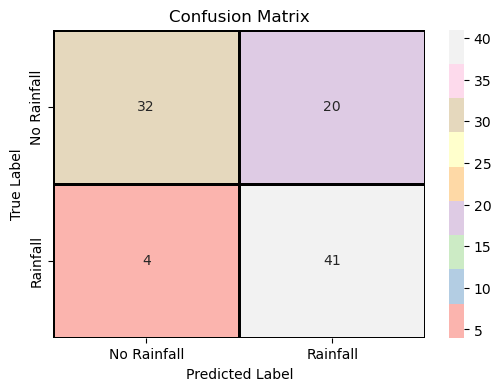

In [250]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel1", xticklabels=["No Rainfall", "Rainfall"], yticklabels=["No Rainfall", "Rainfall"],linewidths=1, linecolor='black')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
plot_confusion_matrix(svm, X_test, y_test)

#### 2. Decision Tree

[[44  8]
 [ 5 40]]


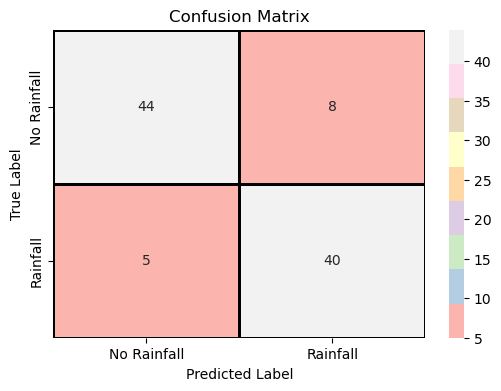

In [248]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel1", xticklabels=["No Rainfall", "Rainfall"], yticklabels=["No Rainfall", "Rainfall"],linewidths=1, linecolor='black')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
plot_confusion_matrix(final, X_test, y_test)

### Input Function

In [258]:
x.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [266]:
feature_order = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 
                 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
feature_suggestions = {
    "pressure": "Enter atmospheric pressure (e.g., 1013.25)",
    "maxtemp": "Enter the maximum temperature in Celsius (e.g., 35.6)",
    "temparature": "Enter the average temperature in Celsius (e.g., 28.4)",
    "mintemp": "Enter the minimum temperature in Celsius (e.g., 22.3)",
    "dewpoint": "Enter the dew point in Celsius (e.g., 20.0)",
    "humidity": "Enter relative humidity as a percentage (e.g., 85 for 85%)",
    "cloud": "Enter cloud cover percentage (e.g., 50 for 50%)",
    "sunshine": "Enter sunshine duration in hours (e.g., 6.5)",
    "winddirection": "Enter wind direction in degrees (e.g., 90 for East)",
    "windspeed": "Enter wind speed in km/h (e.g., 15.0)"
}

def take_input():
    user_data = {}

    # Loop through each feature to collect user input
    for feature in feature_order:
        if feature in feature_suggestions:
            print(f"\n{feature} - {feature_suggestions[feature]}")
        value = input(f"Enter {feature}: ")
        try:
            value = float(value)  # Convert input to float
        except ValueError:
            print(f"❌ Invalid input for {feature}! Please enter a numeric value as instructed.")
            return None  # Exit if invalid input is detected
        user_data[feature] = value
    return user_data

# Taking input from the user
user_input = take_input()

# Processing the input if valid
if user_input is not None:
    input_df = pd.DataFrame([user_input])  # Create a DataFrame with user input
    prediction = svm.predict(input_df)  # Predict rainfall using your model
    
    # Display the prediction with a user-friendly message
    if prediction[0] == 1:
        print("\n🌧️ Predicted Rainfall: 🚨 Yes, Rain is likely")
    else:
        print("\n☀️ Predicted Rainfall: ✅ No, No rain is expected")


pressure - Enter atmospheric pressure (e.g., 1013.25)


Enter pressure:  1000



maxtemp - Enter the maximum temperature in Celsius (e.g., 35.6)


Enter maxtemp:  35



temparature - Enter the average temperature in Celsius (e.g., 28.4)


Enter temparature:  25



mintemp - Enter the minimum temperature in Celsius (e.g., 22.3)


Enter mintemp:  15



dewpoint - Enter the dew point in Celsius (e.g., 20.0)


Enter dewpoint:  20



humidity - Enter relative humidity as a percentage (e.g., 85 for 85%)


Enter humidity:  75



cloud - Enter cloud cover percentage (e.g., 50 for 50%)


Enter cloud:  60



sunshine - Enter sunshine duration in hours (e.g., 6.5)


Enter sunshine:  6



winddirection - Enter wind direction in degrees (e.g., 90 for East)


Enter winddirection:  85



windspeed - Enter wind speed in km/h (e.g., 15.0)


Enter windspeed:  18



☀️ Predicted Rainfall: ✅ No, No rain is expected
